In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Read the training and testing datasets from CSV files
train =  pd.read_csv('uber_sampled_train.csv')
test =  pd.read_csv('uber_sampled_test.csv')

In [4]:
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,13112538,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,27522324,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1
2,26162875,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00 UTC,-73.989912,40.751997,-73.977732,40.748800,1
3,5707300,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54 UTC,-73.987425,40.741593,-73.958254,40.772870,1
4,43561908,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39 UTC,-73.978324,40.745629,-73.994166,40.703158,1


In [5]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,2.770205e+07,11.261658,-72.498630,39.950258,-72.508637,39.918108,1.693429
std,1.602855e+07,9.654077,10.881647,9.566680,10.544393,6.898035,1.319192
min,5.930000e+02,0.010000,-736.016667,-74.008928,-75.415770,-834.457250,0.000000
25%,1.377879e+07,6.000000,-73.992038,40.735181,-73.991315,40.734205,1.000000
50%,2.770764e+07,8.500000,-73.981690,40.752911,-73.980215,40.753299,1.000000
75%,4.159645e+07,12.500000,-73.967018,40.767330,-73.963817,40.768167,2.000000
max,5.542339e+07,247.000000,363.630298,1993.880665,405.566222,42.387233,6.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         70000 non-null  int64  
 1   key                70000 non-null  object 
 2   fare_amount        70000 non-null  float64
 3   pickup_datetime    70000 non-null  object 
 4   pickup_longitude   70000 non-null  float64
 5   pickup_latitude    70000 non-null  float64
 6   dropoff_longitude  70000 non-null  float64
 7   dropoff_latitude   70000 non-null  float64
 8   passenger_count    70000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 4.8+ MB


In [7]:
train.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
test.head(3)

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1


In [9]:
test.dtypes

Unnamed: 0             int64
key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'])

In [11]:
train.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [12]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [13]:
test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9909    False
9910    False
9911    False
9912    False
9913    False
Length: 9914, dtype: bool

In [14]:
train.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
test.isna().sum()

Unnamed: 0           0
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
train.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [17]:
# Filter the 'train' DataFrame based on valid geographical coordinates for both pickup and dropoff points
train = train[
    (train['pickup_longitude'] > -180) & (train['pickup_longitude'] < 180) &
    (train['pickup_latitude'] > -90) & (train['pickup_latitude'] < 90) &
    (train['dropoff_longitude'] > -180) & (train['dropoff_longitude'] < 180) &
    (train['dropoff_latitude'] > -90) & (train['dropoff_latitude'] < 90)
]


In [18]:
# Filter the 'test' DataFrame based on valid geographical coordinates for both pickup and dropoff points
test = test[
    (test['pickup_longitude'] > -180) & (test['pickup_longitude'] < 180) &
    (test['pickup_latitude'] > -90) & (test['pickup_latitude'] < 90) &
    (test['dropoff_longitude'] > -180) & (test['dropoff_longitude'] < 180) &
    (test['dropoff_latitude'] > -90) & (test['dropoff_latitude'] < 90)
]


In [19]:
# Importing necessary library for calculating geographical distance
from geopy.distance import geodesic

# Define a function to calculate the distance between two points using their latitude and longitude
def find_distance(lat1, lon1, lat2, lon2):
    # Create tuples representing the coordinates of the two points
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return geodesic(point1, point2).km

# Apply the find_distance function to calculate the distance for each row in the 'train' and 'test' DataFrame
train['distance'] = train.apply(lambda row: find_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test['distance'] = test.apply(lambda row: find_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [20]:
# Extracting temporal features (year, month, day, hour, and day_of_week) from the 'pickup_datetime' column in the 'train' DataFrame
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_year'] = train['pickup_datetime'].dt.year
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_dayofweek'] = train['pickup_datetime'].dt.dayofweek

# Extracting temporal features (year, month, day, hour, and day_of_week) from the 'pickup_datetime' column in the 'test' DataFrame
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_year'] = test['pickup_datetime'].dt.year
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_dayofweek'] = test['pickup_datetime'].dt.dayofweek

In [21]:
train.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek
0,13112538,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00+00:00,-73.963927,40.776715,-73.981230,40.744362,5,3.878493,2013,9,12,19,3
1,27522324,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1,5.828729,2013,8,22,21,3
2,26162875,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1,1.088167,2009,5,11,18,0
3,5707300,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1,4.258112,2009,11,17,20,1
4,43561908,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1,4.902574,2011,7,14,20,3


In [22]:
test.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek
0,0,2015-01-27 13:08:24.0000002,2013-09-12 19:48:00+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.320991,2013,9,12,19,3
1,1,2015-01-27 13:08:24.0000003,2013-08-22 21:51:33+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.423802,2013,8,22,21,3
2,2,2011-10-08 11:53:44.0000002,2009-05-11 18:46:00+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618182,2009,5,11,18,0
3,3,2012-12-01 21:12:12.0000002,2009-11-17 20:52:54+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.959671,2009,11,17,20,1
4,4,2012-12-01 21:12:12.0000003,2011-07-14 20:33:39+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.382833,2011,7,14,20,3


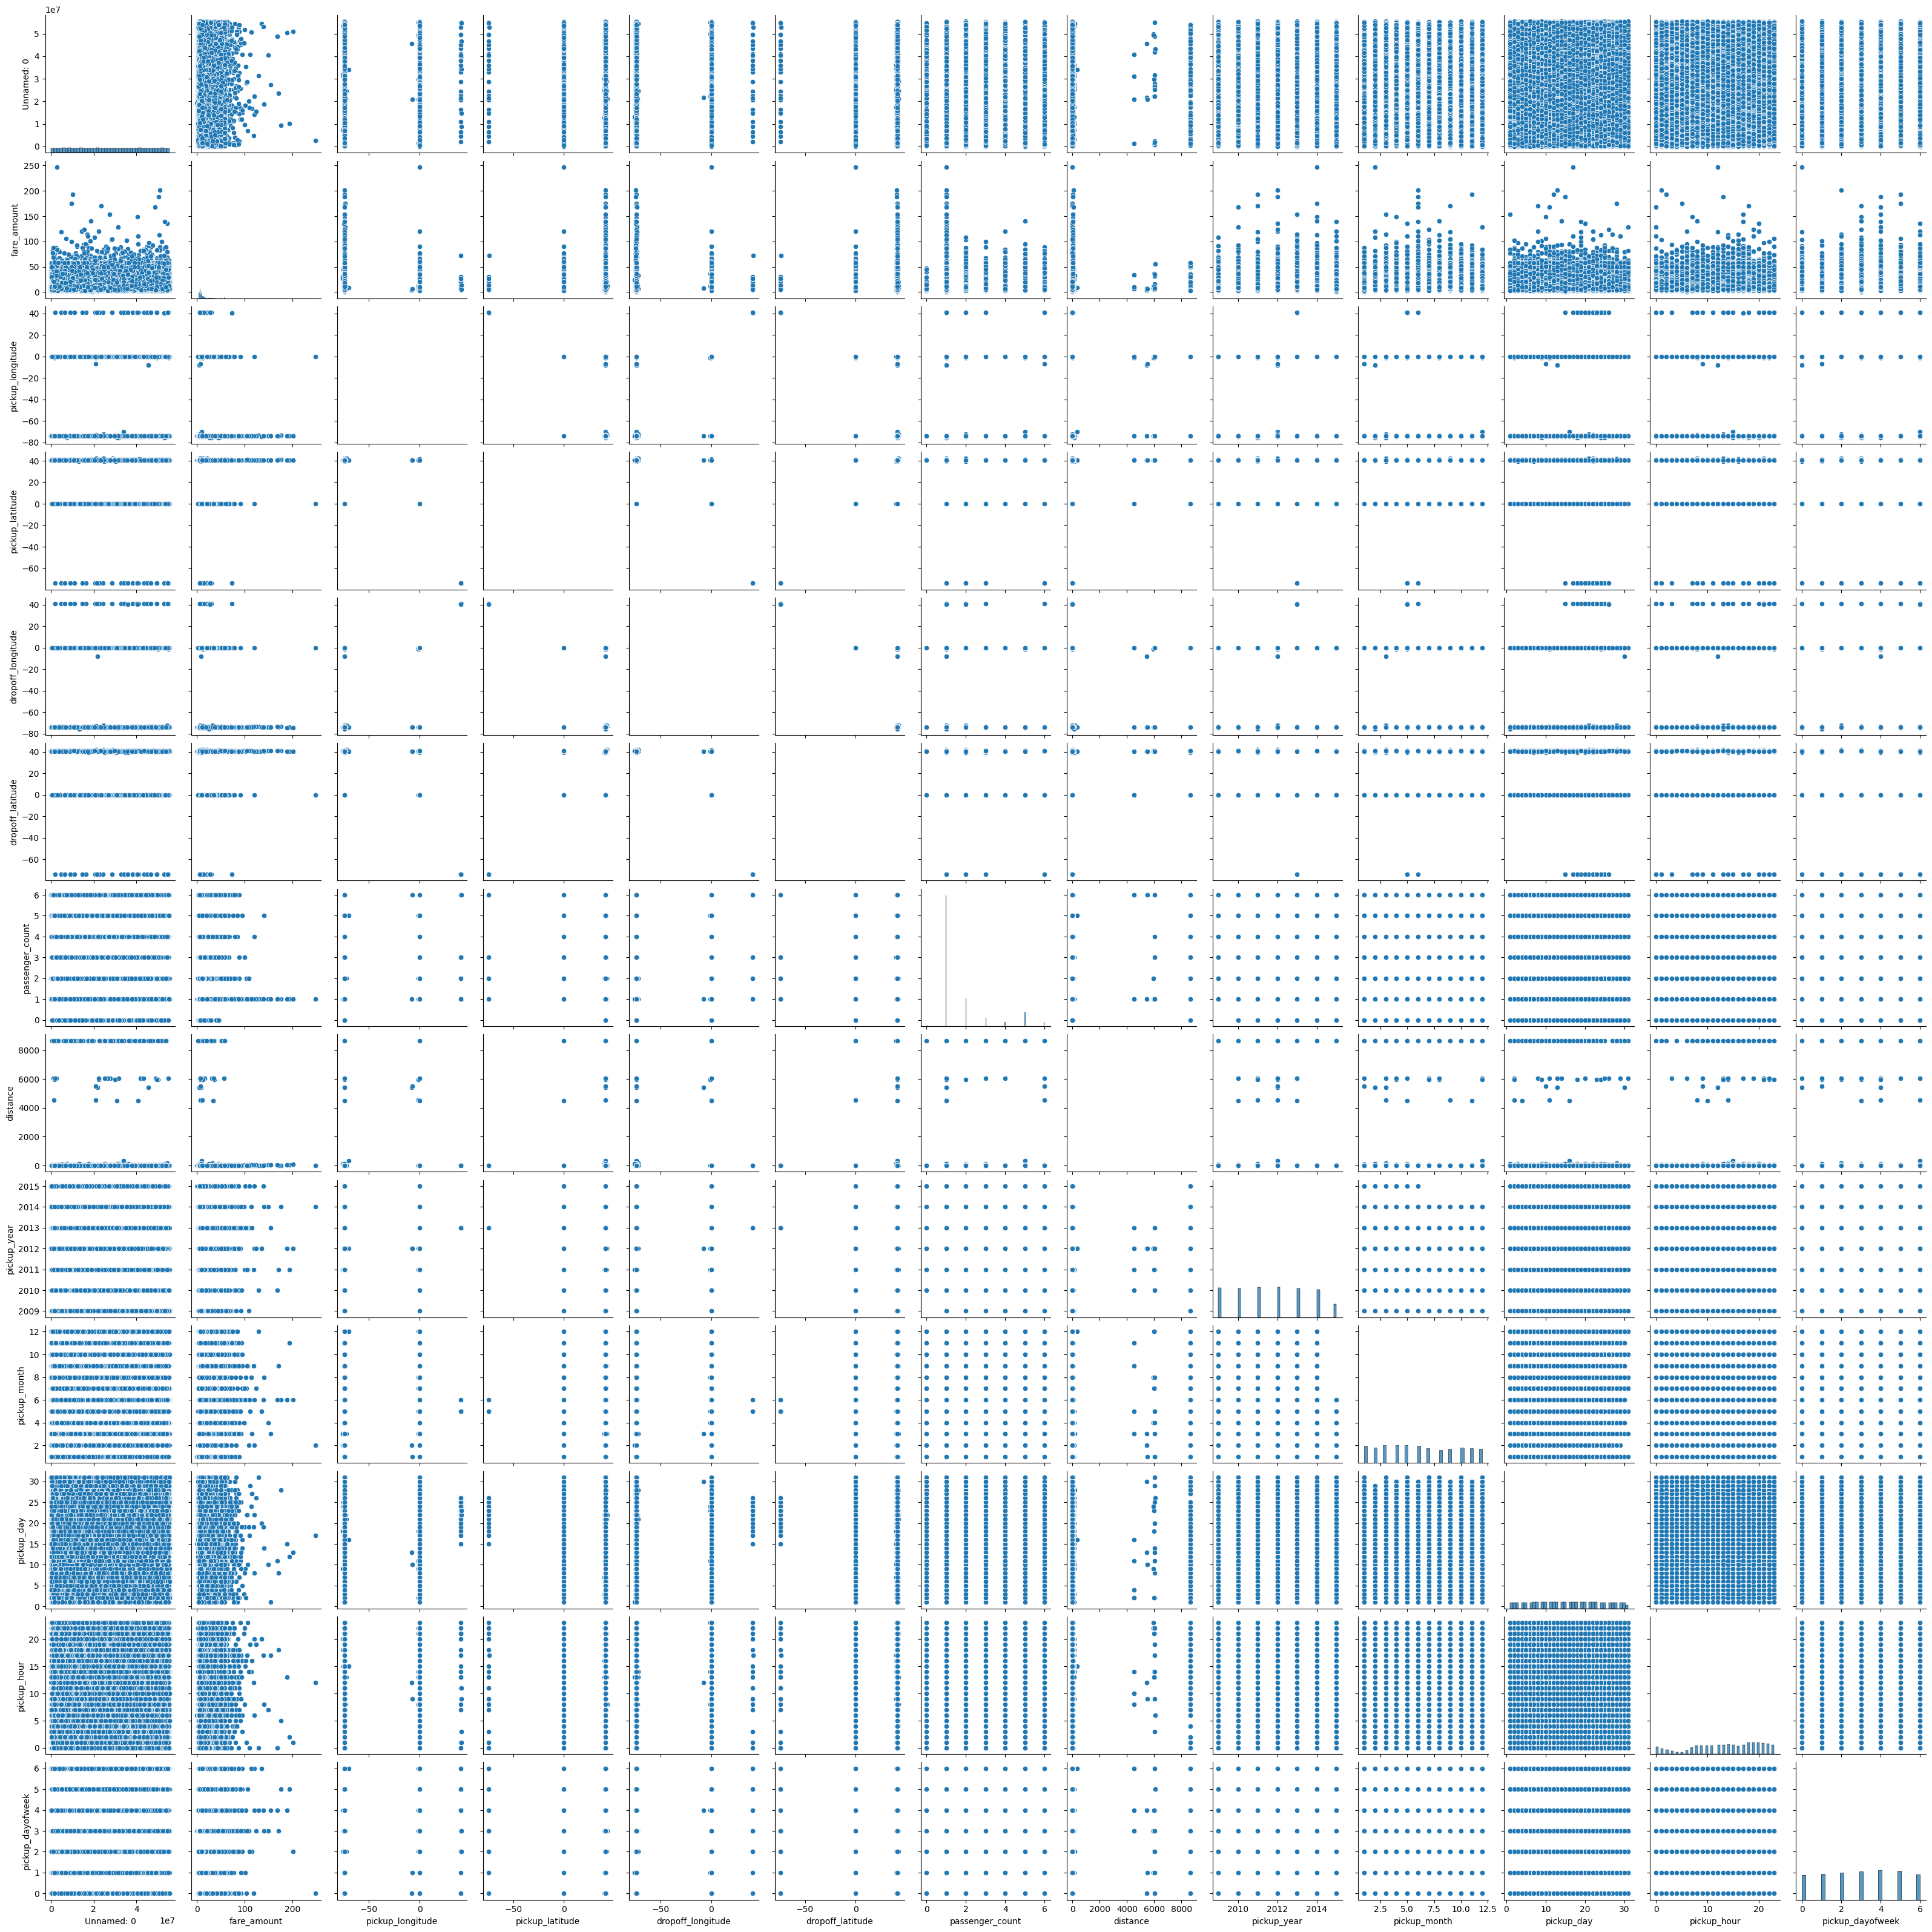

In [23]:
# Explore relationships between features using scatter plots and correlations
sns.pairplot(train)
plt.show()

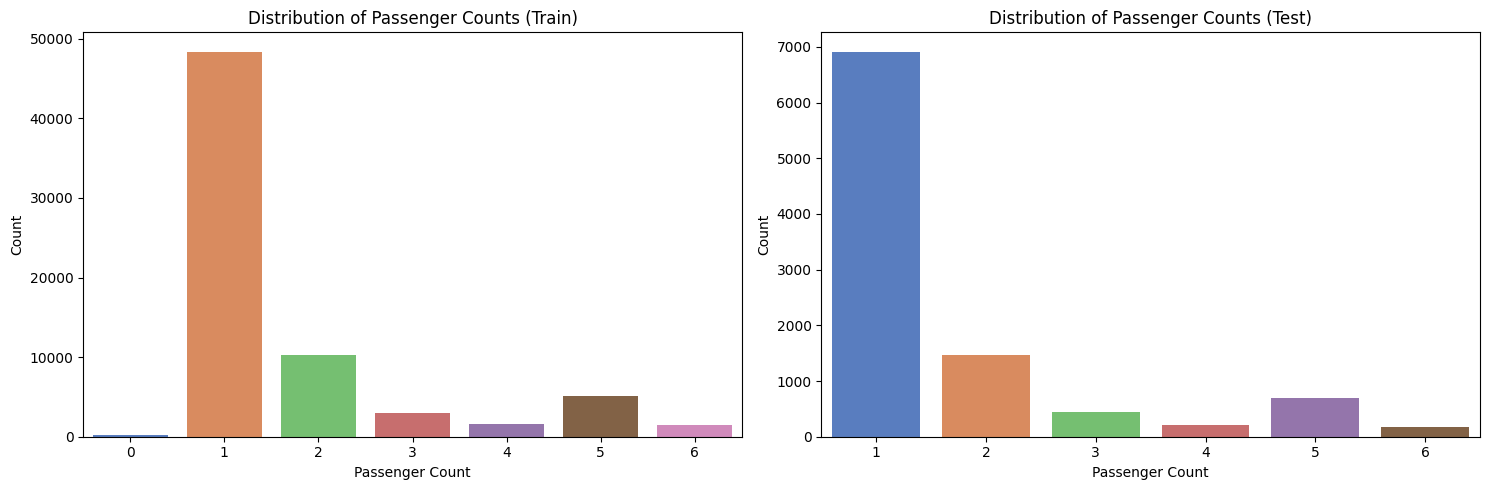

In [24]:
# Create subplots for separate countplots in the same plane with mixed colors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for 'train' DataFrame 
sns.countplot(x='passenger_count', data=train, palette='muted', ax=axes[0])
axes[0].set_title('Distribution of Passenger Counts (Train)')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Count')

# Plot for 'test' DataFrame 
sns.countplot(x='passenger_count', data=test, palette='muted', ax=axes[1])
axes[1].set_title('Distribution of Passenger Counts (Test)')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [25]:
len(train)

69998

In [26]:
# Filter the 'train' DataFrame to include only rows where passenger_count is greater than 0
train = train[train['passenger_count'] > 0]

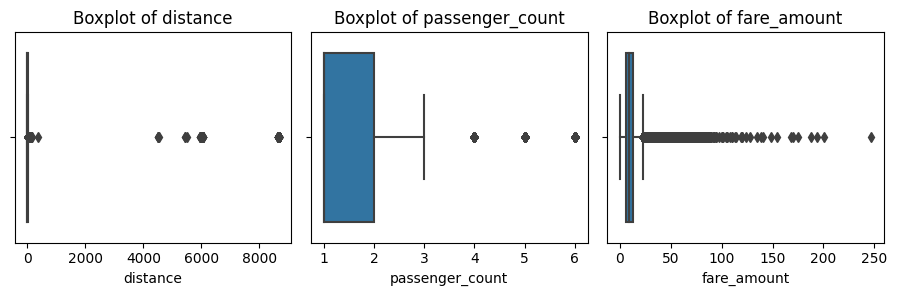

In [27]:
# Define columns of interest
columns = ['distance', 'passenger_count', 'fare_amount']

# Create a boxplot for each specified column in the 'train' DataFrame
plt.figure(figsize=(12, 8))

for column in columns:
    plt.subplot(3, 4, columns.index(column) + 1)
    sns.boxplot(x=train[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()

In [28]:
# Filter the 'train' DataFrame to include only rows where 'fare_amount' is less than 60
train = train[train['fare_amount'] < 60]

# Filter the 'train' DataFrame to include only rows where 'distance' is less than 2000
train = train[train['distance'] < 2000]

In [29]:
train.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'distance', 'pickup_year',
       'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_dayofweek'],
      dtype='object')

In [30]:
# Selecting relevant columns for modeling
train = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_datetime','passenger_count', 'distance', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_dayofweek', 'fare_amount']]

In [31]:
train.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,fare_amount
0,-73.963927,40.776715,-73.981230,40.744362,2013-09-12 19:48:00+00:00,5,3.878493,2013,9,12,19,3,14.5
1,-73.987196,40.720433,-73.979128,40.772561,2013-08-22 21:51:33+00:00,1,5.828729,2013,8,22,21,3,18.5
2,-73.989912,40.751997,-73.977732,40.748800,2009-05-11 18:46:00+00:00,1,1.088167,2009,5,11,18,0,5.3


In [32]:
# Selecting relevant columns for modeling
test = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count', 'distance', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_dayofweek']]

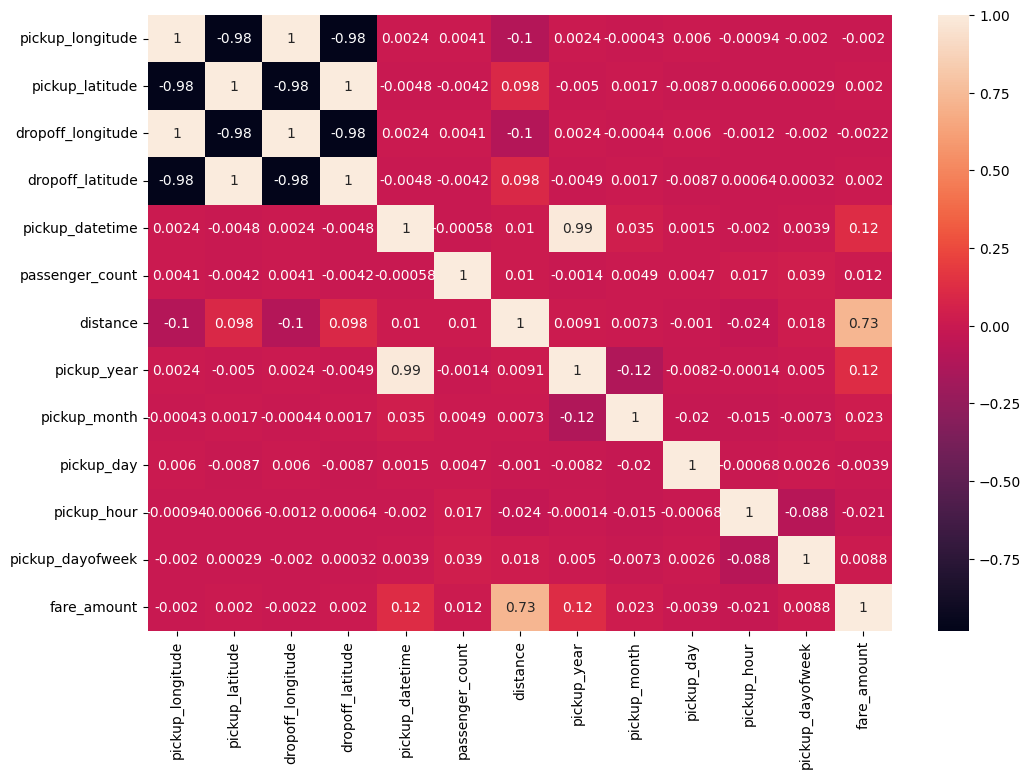

In [33]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot = True)
plt.show()

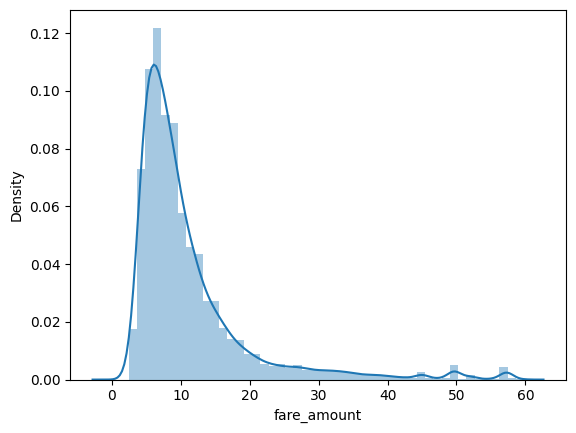

In [34]:
sns.distplot(train['fare_amount'])
plt.show()

<Axes: xlabel='passenger_count', ylabel='Density'>

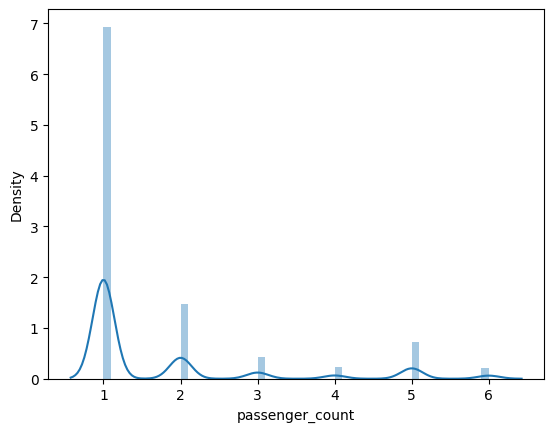

In [35]:
sns.distplot(train['passenger_count'])

In [36]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# x = df.drop(['Length', 'Diameter'] , axis=1)
# vif_data =  pd.DataFrame()
# vif_data['Feature'] = x.columns

# vif_data['VIF'] =  [variance_inflation_factor(x.values, i)
#                    for i in range(len(x.columns))]
# print(vif_data)

In [37]:
x = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance', 'pickup_year','pickup_month', 'pickup_hour', 'pickup_dayofweek']]
y = train['fare_amount']


In [38]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, t_test  =  train_test_split(x,y,train_size=0.8 ,random_state=42)

In [39]:
import statsmodels.api as sm 

In [40]:
x_train_sm =  sm.add_constant(x_train)

In [41]:
lr =  sm.OLS(y_train,x_train_sm).fit()

In [42]:
# lr.params

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     8470.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:40:55   Log-Likelihood:            -1.7351e+05
No. Observations:               55536   AIC:                         3.470e+05
Df Residuals:                   55525   BIC:                         3.471e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1067.2558     25.33

In [44]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_hour,pickup_dayofweek
57669,-73.963018,40.799130,-73.955920,40.763950,1,3.952406,2012,10,8,3
64266,-73.976133,40.761052,-73.988577,40.757770,1,1.112189,2010,5,1,6
17280,-74.000488,40.729923,-73.847862,40.715336,1,12.996251,2015,2,21,4
1311,-73.984967,40.736347,-73.972902,40.755777,1,2.386191,2010,8,21,6
53860,-73.983477,40.741206,-73.982352,40.731549,2,1.076601,2009,4,18,3


In [45]:
y_train.head()

57669    20.0
64266     4.9
17280    39.5
1311      5.7
53860     6.3
Name: fare_amount, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Split the dataset into training and testing sets
X = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance', 'pickup_year','pickup_month', 'pickup_hour', 'pickup_dayofweek']]
y = train['fare_amount']
# x_test = test[['passenger_count','distance', 'pickup_year','pickup_month', 'pickup_hour', 'pickup_dayofweek']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()), # linear model
    ('Ridge Regression', Ridge( random_state=42)), # Ridge regression
    ('Lasso Regression', Lasso( random_state=42)), # Lasso regression
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=0)), # tree
    ('Random Forest Regression', RandomForestRegressor(n_estimators=50, random_state=0)), # bagging
    ('XGB Regressor', XGBRegressor(n_estimators=50 , random_state=0)),
    ('Ada Boost Regressor', AdaBoostRegressor(n_estimators= 50, random_state=0))
]

# Loop through each model and calculate evaluation metrics
for name, model in models:
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the evaluation metrics
    print(name)
    print(f'R-squared: {r2:.4f}')
    print(f'Adjusted R-squared: {adj_r2:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print()


Linear Regression
R-squared: 0.2485
Adjusted R-squared: 0.2483
MSE: 58.8652
RMSE: 7.6724
MAE: 2.7640

Ridge Regression
R-squared: 0.2496
Adjusted R-squared: 0.2495
MSE: 58.7729
RMSE: 7.6663
MAE: 2.7633

Lasso Regression
R-squared: 0.3155
Adjusted R-squared: 0.3154
MSE: 53.6112
RMSE: 7.3220
MAE: 2.8625

Decision Tree Regression
R-squared: 0.6536
Adjusted R-squared: 0.6535
MSE: 27.1326
RMSE: 5.2089
MAE: 2.6718

Random Forest Regression
R-squared: 0.8177
Adjusted R-squared: 0.8177
MSE: 14.2764
RMSE: 3.7784
MAE: 1.9358

XGB Regressor
R-squared: 0.8286
Adjusted R-squared: 0.8286
MSE: 13.4240
RMSE: 3.6639
MAE: 1.8108

Ada Boost Regressor
R-squared: 0.4941
Adjusted R-squared: 0.4941
MSE: 39.6223
RMSE: 6.2946
MAE: 5.0372



In [58]:
# Final result we are using XG Boost Regressor because XG Boost Regressor have low RMSE value 

X_test  =  test
XGBRegressor = XGBRegressor()
XGBRegressor.fit(x_train, y_train)
y_pred_test = XGBRegressor.predict(x_test)

In [59]:
y_pred_test

array([ 5.011735, 10.386539, 10.223783, ...,  4.662083,  8.478731,
        4.841381], dtype=float32)